# Exercice 3 : Python

Nous allons nous intéresser à un algorithme permettant de calculer le chemin le plus court entre 2 sommets d'un graphe. Ce dernier est par exemple utilisé pour les systèmes GPS.

Avant de commencer à programmer l'algorithme, nous allons prendre le temps de nous familiariser avec certaines méthodes dont vous aurez besoin. 

# a) Un petit échauffement

Ci-dessous vous trouverez du code. A nouveau, vous n'avez pas besoin de comprendre ce qu'est une classe mais lisez les commentaires et familiarisez-vous avec ce dernier :

In [ ]:
class Graph:
    #Cette partie du code permet de créer un graphe lorsqu'on appelle Graph(), il faut spécifier une matrice d'adjascence
    def __init__(self, connections): 
        length = len(connections)   
        self._nodes = {}
        for column in range(length):
            column_length = len(connections[column])
            if column_length is not length:
                raise ValueError("Length of column %d is not the same as the total length (%d)" % (column, length))
            for row in range(column_length):
                connection_value = connections[column][row]
                if not connection_value:
                    continue
                value1 = chr(column + 65)
                value2 = chr(row + 65)
                n1 = self.add_node(value1)
                n2 = self.add_node(value2)
                self.connect(connection_value, n1, n2)
                
    #Cette fonction permet d'ajouter un sommet à notre graphe
    def add_node(self, value):
        if value not in self._nodes:
            self._nodes[value] = self.Node(value)
        return self._nodes[value]
    
    #Cette fonction permet de connecter 2 sommets par une arrête et de lui donner un poids
    def connect(self, value, node1, node2):
        relationship = self.Relationship(value, node1, node2)
        node1.add_relationship(relationship)

    #Cette fonction permet de récupérer les informations d'un sommet du graphe
    def get_node(self, value):
        if value in self._nodes:
            return self._nodes[value]
        return None
    
    #Les sommets du graphes sont noté par des valeurs (ici, A,B,C,...), cette fonction liste toutes
    #les valeurs apparaissant dans le graphes
    def get_values(self):
        return set(self._nodes.keys())

    def __eq__(self, other):
        length = len(self._nodes)
        if length is not len(other._nodes):
            return False
        for key in self._nodes:
            corresponding = other.get_node(key)
            if corresponding != self._nodes[key]:
                return False
        return True

    class Node:
        def __init__(self, value):
            self.value = value
            self.relationships = []
            
        #Un sommet contient la liste de tout les sommets auxquels il est relié.    
        #Cette fonction permet d'ajouter un sommet à la liste.
        def add_relationship(self, relationship): 
            self.relationships.append(relationship)
            
            
        def __str__(self, visited = set(), depth=0):
            if self.value in visited:
                return "{\"value:\" " + self.value + "}"
            output = "{\"value\": %s, \"relationships\": [" % self.value
            for i in self.relationships:
                output += "\n" 
                for _ in range(depth):
                    output += "\t"
                output += i.to.__str__(visited, depth+1)
            output += "]},"
            visited.add(self.value)
            return output
        
        
        #Donne tout les sommets auquels le sommet un sommet est relié
        def get_relationships(self):
            return set([(rel.to.value, rel.value) for rel in self.relationships])

        def __eq__(self, other):
            if self.value != other.value:
                return False
            if self.get_relationships() != other.get_relationships():
                return False
            return True

    #Une relation, i.e. une arrête, part d'un endroit arrive à un endroit et à un certain poids.
    #Permet de créer une relation.
    class Relationship:
        def __init__(self, value, _from, _to):
            self.value = value
            self._from = _from
            self.to = _to

Pour cet exercice, nous allons considérer le graphe suivant :

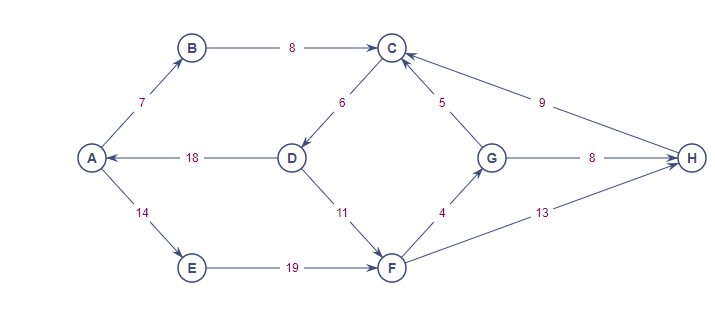

Premièrement, à la main, écrivez ce graphe sous la forme d'une adjascency matrix.
- **Hint** : Dans un graphe dirigé, puisqu'on ne devrait pas pouvoir aller de B à A directement par exemple, il suffit d'assigner un poids infini à une arrête fictive entre B et A.

Maintenant que nous avons notre matrice d'adjascence, il faut la programmer. Une fois que cela est fais, appeler le **constructeur** Graph(Votre_matrice_d'ajascence) pour créer le graphe.

- **Hint** : A la place d'attribuer un poids infini, attribuer juste un poids arbitrairement important, cela est suffisant pour que notre algorithme fonctionne correctement. Pour ce faire, utilisez la variable i ci-dessous.

In [ ]:
i = 99999 #Référez vous au hint

Adjascency_matrix = None 

graphe = Graph(Adjascency_matrix)

Exécutez le bout de code ci-dessous, il vous permettera de vous assurez que vous n'avez pas faire d'erreur dans la création de l'adjascency matrix.

In [ ]:
from Corr import is_matrix_right

is_matrix_right(Adjascency_matrix)

La première étape étant complétée, nous allons maintenant nous intéresser à comment récupérer des informations concernant notre graphe. Voici une liste non-exhaustive des opérations que l'on peut effectuer :

- get_node() permet d'accéder à un noeud. Par exemple, en faisant graphe.get_node('A'), j'obtiens des informations concernant le noeud A
- Lorsque l'on accède à un noeud par la fonction get_node(), on peut ensuite accéder à la liste de toutes les arrêtes qui s'y connecte par l'attribut relationships. On peut par la suite distinguer les arrêts partant du noeud et les arrêtes y arrivant à l'aide des attributs relationship.\_from et relationship.to.

L'exemple de code ci-dessous devrait vous aider à mieux comprendre :

In [ ]:
A = graphe.get_node('A')
Arrete_liee_noeud_A = A.relationships #Cette variable continent une liste d'arrête
#A ce stade, vous ne savez pas encore comment "lire" ce que contient la variable Arrete_liee_noeud_A

print("Le nombre d'arrête liée à A est : {}.".format(len(Arrete_liee_noeud_A)))

#Cependant, vous pouvez voir que le sommet A est bien lié à 7 autres sommets. (Pour rappel, le sommet A est virtuellement
#lié à 7 sommets dans la matrice d'adjascence)

vertice = Arrete_liee_noeud_A[1] #On sélectionne la 2ème arrête liée au sommet A (pour rappele les indice d'une liste 
#python commence à 0)

#Pour déterminer d'ou vient l'arrête et ou elle se termine, utilisez .to.value et _from.value :
print("L'arrête part du point : {}".format(vertice._from.value))
print("Et arrive au point : {}".format(vertice.to.value))

#Pour obtenir le poids de cette arrête, faites : vertice.value :
print("Le poids de l'arrête est : {}".format(vertice.value))

Pour vous assurer que vous avez bien compris comment tout cela fonction, écrivez un code qui permet d'afficher tout les noeuds **partant** d'un sommet donné et d'afficher le poids de l'arrête reliant ces 2 sommets.

- **Hint 1** : Vous devrez retirez les sommets reliés par une arrête avec un poids de 99999
- **Hint 2** : Utilisez une boucle for pour parcourir les arrêtes

In [ ]:
def linked(graph,N):
    #Codez ici
    
    return None

linked(graphe,"D")

Votre output devrait être:
- A 18
- F 11

# b) L'algorithme de Dijkstra

**L'algorithme de Dijkstra** permet de calculer le chemin le plus court entre 2 sommets d'un graphe. L'algorithme de Dijkstra que l'on va utiliser se construit de façon récursive. On initialise l'algorithme en partant au point de départ. Puis l'on va se déplacer vers tout les sommets atteignable depuis notre point de départ et appliquer l'algorithme de dijkstra à ces voisins. Ainsi de suite jusqu'à ce que l'on atteigne le sommet de destination. Pour éviter de créer une boucle infinie à cause des cycles, nous appliquerons uniquement Dijkstra aux voisins qui n'ont pas encore été visité. 



- **Hint 1** : Le chemin le plus court entre le sommet A et H devrait être ABCDFGH
- **Hint 2** : Lorsque vous appliquerez Dijkstra aux voisins d'un sommet, pour choisir le chemin optimal vous devrez additionez la distance entre le sommet de départ et le poids du chemin fourni par Dijkstra.
- **Hint 3** : Attention, lorsque vous devez déterminer quels voisins sont atteignables, ceux dont le poids est de 99999 ne sont pas atteignables
- **Hint 4** : L'algorithme doit retourner un tuble contenant la distance totale du trajet et le trajet.

In [3]:
from math import inf

def dijkstra(origin,destination,visited = None):
    
        if visited is None:#A l'initialisation, l'ensemble des sommets atteints est vide
            visited = set()
        
        #Codez ici
        
        return (distance, path)

In [ ]:
dijkstra(graphe.get_node('A'), 'H'))
#Si votre algorithme est correct, ce bout de code devrait retourner (45, 'ABCDFGH')